# Import Dataset & EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\samsung\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [52]:
#x_train = pd.DataFrame(x_train.reshape(60000,-1))
y_train = pd.Series(y_train).astype('object')

In [5]:
x_train.shape

(60000, 784)

# Data Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(pd.DataFrame(x_scaled),y_train,test_size=0.2,
                                              random_state=123,stratify=y_train)

In [11]:
X_train.shape, X_val.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 28, 28))

# Non-Linear method  
( = "Manifold Learning" )
- 아이소맵 (Isomap)
- 다차원 스케일링 ( MDS, Multi-Dimensional Scaling )
- LLE ( Locally Linear Embedding )
- t-SNE ( t-Stochastic Neighbor Embedding )
- 사전 학습 ( Dictionary Learning )
- 독립 성분 분석 ( ICA, Independent Component Analysis )

In [12]:
from sklearn.manifold import Isomap,MDS,LocallyLinearEmbedding,TSNE
from sklearn.decomposition import MiniBatchDictionaryLearning,FastICA

In [13]:
def reduced_df(X_train,X_val,method,dim,sample_size,fit_trans=True):
    if fit_trans is False :
        method.fit(X_train.iloc[0:sample_size,:])    
        X_train_reduced = method.transform(X_train)        
        X_val_reduced = method.transform(X_val)
        X_train_reduced = pd.DataFrame(X_train_reduced,index=X_train.index)
        X_val_reduced = pd.DataFrame(X_val_reduced,index=X_val.index)
    else:
        X_train_reduced = method.fit_transform(X_train.iloc[0:sample_size,:]) 
        X_val_reduced = method.fit_transform(X_val)    
        X_train_reduced = pd.DataFrame(X_train_reduced,index=X_train.index[0:sample_size])
        X_val_reduced = pd.DataFrame(X_val_reduced,index=X_val.index)
        
    X_train_reduced = pd.concat([X_train_reduced,Y_train],axis=1)
    X_val_reduced = pd.concat([X_val_reduced,Y_val],axis=1)
    colnames = ["PC" + str(i) for i in range(1,dim+1)]
    colnames.append('class')
    X_train_reduced.columns = colnames
    X_val_reduced.columns = colnames
    return X_train_reduced,X_val_reduced

## Isomap

In [14]:
n_neighbors = 5
n_components = 10
n_jobs = 3

In [15]:
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components,n_jobs=n_jobs)

In [16]:
X_train_iso, X_val_iso = reduced_df(X_train,X_val,isomap,n_components,2500,fit_trans=False)

## MDS ( Multi Dimensional Scaling )

In [20]:
n_components = 2 
n_init = 6
max_iter= 500
metric= True
#n_jobs = 3
random_state=123

In [24]:
mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter,
         metric=metric,random_state=random_state)

In [26]:
X_train_mds, X_val_mds = reduced_df(X_train,X_val,mds,n_components,500,fit_trans=True)

## LLE ( Locally Linear Embedding )

In [27]:
n_components = 2
n_neighbors = 10
method = 'modified'
#n_jobs = 3
random_state = 123

In [28]:
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors,n_components=n_components,
                             method=method,random_state=random_state)

In [30]:
#X_train_lle, X_val_lle = reduced_df(X_train,X_val,lle,n_components,2500,fit_trans=False)

## t-SNE ( t-Stochastic Neighbor Embedding )

### PCA로 한번 1차적 차원 축소

In [36]:
from sklearn.decomposition import PCA
n_components = 9
random_state = 123

pca = PCA(n_components=n_components,random_state=random_state)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train),index=X_train.index)
X_val_pca = pd.DataFrame(pca.fit_transform(X_val),index=X_val.index)

### t-SNE로 2차적 차원 축소

In [ ]:
n_components = 2
lr = 200
perplexity = 20
ee=12
init='random'
random_state=123

In [ ]:
tsne = TSNE(n_components=n_components,learning_rate=lr,perplexity=perplexity,
           early_exaggeration=ee,init=init,random_state=random_state)

In [ ]:
X_train_tsne, X_val_tsne = reduced_df(X_train,X_val,tsne,n_components,2500,fit_trans=True)

## Dictionary Learning

In [ ]:
n_components = 50
alpha = 1
batch_size = 128
n_iter = 20
random_state = 123

In [ ]:
mbDL = MiniBatchDictionaryLearning(n_components=n_components,alpha=alpha,
                                  batch_size=batch_size,n_iter=n_iter,random_state=random_state)

In [ ]:
X_train_dl, X_val_dl = reduced_df(X_train,X_val,mbDL,n_components,5000,fit_trans=False)

## ICA ( Independent Component Analysis )

In [ ]:
n_components = 20
algorithm = 'parallel'
whiten = True
max_iter = 60
random_state = 123

In [ ]:
ica = FastICA(n_components,n_components,algorithm=algorithm,whiten=whiten,
             max_iter=max_iter, random_state=random_state)

In [39]:
X_train.shape[0]

48000

In [ ]:
X_train_ica, X_val_ica = reduced_df(X_train,X_val,ica,n_components,X_train.shape[0],fit_trans=True)

# Visualizing various methods

In [46]:
def viz_scatter(df,method):    
    sns.scatterplot(x="PC1", y="PC2", hue='class',data=df)
    plt.title("Method : "+method,fontsize=20)

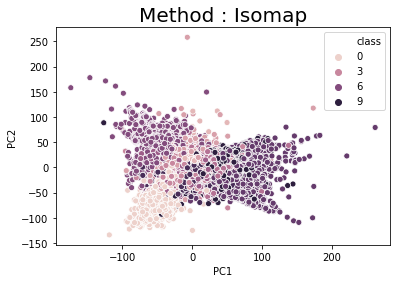

In [48]:
viz_scatter(X_train_iso,'Isomap')

In [ ]:
viz_scatter(X_train_mds,'MDS')

In [ ]:
viz_scatter(X_train_lle,'LLE')

In [ ]:
viz_scatter(X_train_tsne,'t-SNE')

In [ ]:
viz_scatter(X_train_dk,'Dictionary Learning')

In [ ]:
viz_scatter(X_train_ica,'ICA')